In [211]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [212]:
df = pd.read_csv('babies.txt')

In [213]:
df

,bwt smoke
0,120 0
1,113 0
2,128 1
3,123 0
4,108 1
...,...
1231,113 0
1232,128 0
1233,130 1
1234,125 0


Phần 1: Mô tả dữ liệu bằng các trị số
Câu 1: Tính các đại lượng thống kê chi hai tập dữ liệu

In [214]:
# Đặt tên cho cột
df.columns = ['bwt_smoke']

In [215]:
# Tách cột 'bwt_smoke' thành hai cột 'bwt' và 'smoke'
df[['bwt', 'smoke']] = df['bwt_smoke'].str.split(expand=True)

In [216]:
# Chuyển đổi kiểu dữ liệu cho các cột mới tách
df['bwt'] = df['bwt'].astype(int)
df['smoke'] = df['smoke'].astype(int)

In [217]:
# Loại bỏ cột 'bwt_smoke'
df.drop(columns=['bwt_smoke'], inplace=True)

In [218]:
df

,bwt,smoke
0,120,0
1,113,0
2,128,1
3,123,0
4,108,1
...,...,...
1231,113,0
1232,128,0
1233,130,1
1234,125,0


In [219]:
# Loại bỏ các hàng có giá trị smoke là 9
#data = df[df['smoke'] != 9]

In [220]:
# Tách dữ liệu thành hai nhóm: mẹ hút thuốc và mẹ không hút thuốc
group1 = df[df['smoke'] == 1]['bwt']
group2 = df[df['smoke'] == 0]['bwt']


In [221]:
# Hàm tính toán các giá trị thống kê
def calculate_statistics(group):
    return {
        'Số lượng': len(group),
        'Min': np.min(group),
        'Max': np.max(group),
        'Mean': np.mean(group),
        'Sd': np.std(group, ddof=1),
        'Var': np.var(group, ddof=1),
        'Median': np.median(group),
        'Quantile 0%': np.quantile(group, 0),
        'Quantile 25%': np.quantile(group, 0.25),
        'Quantile 50%': np.quantile(group, 0.5),
        'Quantile 75%': np.quantile(group, 0.75),
        'Quantile 100%': np.quantile(group, 1),
        'IQR': np.quantile(group, 0.75) - np.quantile(group, 0.25),
        'Skewness': skew(group),
        'Kurtosis': kurtosis(group)
    }

In [222]:
# Tính toán các giá trị thống kê cho mỗi nhóm
stats_group1 = calculate_statistics(group1)
stats_group2 = calculate_statistics(group2)

In [223]:
# Tạo DataFrame để hiển thị kết quả
results = pd.DataFrame([stats_group1, stats_group2], index=['TH1: Bà mẹ hút thuốc', 'TH2: Bà mẹ không hút thuốc'])

In [224]:
results

,Số lượng,Min,Max,Mean,Sd,Var,Median,Quantile 0%,Quantile 25%,Quantile 50%,Quantile 75%,Quantile 100%,IQR,Skewness,Kurtosis
TH1: Bà mẹ hút thuốc,484,58,163,114.109504,18.098946,327.571835,115.0,58,102.0,115.0,126.0,163,24.0,-0.033595,-0.011968
TH2: Bà mẹ không hút thuốc,742,55,176,123.047170,17.398689,302.714371,123.0,55,113.0,123.0,134.0,176,21.0,-0.186984,1.037060


In [225]:
# Phân tích dữ liệu của nhóm mẹ hút thuốc
stats_smoke = results.loc['TH1: Bà mẹ hút thuốc']

# Tính range
range_value = stats_smoke['Max'] - stats_smoke['Min']

# Tính IQR
iqr = stats_smoke['Quantile 75%'] - stats_smoke['Quantile 25%']

# In kết quả phân tích dữ liệu
print("Phân tích dữ liệu của nhóm mẹ hút thuốc:")
print(f"1. Vị trí tập trung của dữ liệu: khoảng giá trị {stats_smoke['Mean']}-{stats_smoke['Median']}")
print("2. Tính biến động của dữ liệu:")
print(f"   - Phương sai (variance): var = {stats_smoke['Var']}")
print(f"   - Độ lệch chuẩn (standard deviation): sd = {stats_smoke['Sd']}")
print(f"   - Khoảng giá trị (range): min = {stats_smoke['Min']}, max = {stats_smoke['Max']} → range = {range_value}")
print(f"   - Khoảng cách giữa 2 phần tư vị (IQR): Q3-Q1 = {stats_smoke['Quantile 75%']}-{stats_smoke['Quantile 25%']} = {iqr}")
print("   Nhận xét: Dữ liệu phân bố gần nhau.")
print("3. Hình dạng phân bố của dữ liệu:")
print(f"   - Độ lệch (Skewness): skewness = {stats_smoke['Skewness']}")
print(f"     Nhận xét: Dữ liệu hơi lệch về phía trái.")
print(f"   - Độ bè nhọn của đỉnh dữ liệu (Kurtosis): kurtosis = {stats_smoke['Kurtosis']}")
print(f"     Nhận xét: Đỉnh dữ liệu nhọn, hai bên giảm với tốc độ vừa phải.")

Phân tích dữ liệu của nhóm mẹ hút thuốc:
1. Vị trí tập trung của dữ liệu: khoảng giá trị 114.10950413223141-115.0
2. Tính biến động của dữ liệu:
   - Phương sai (variance): var = 327.57183495029346
   - Độ lệch chuẩn (standard deviation): sd = 18.09894568615237
   - Khoảng giá trị (range): min = 58.0, max = 163.0 → range = 105.0
   - Khoảng cách giữa 2 phần tư vị (IQR): Q3-Q1 = 126.0-102.0 = 24.0
   Nhận xét: Dữ liệu phân bố gần nhau.
3. Hình dạng phân bố của dữ liệu:
   - Độ lệch (Skewness): skewness = -0.03359497605204854
     Nhận xét: Dữ liệu hơi lệch về phía trái.
   - Độ bè nhọn của đỉnh dữ liệu (Kurtosis): kurtosis = -0.011967521206595944
     Nhận xét: Đỉnh dữ liệu nhọn, hai bên giảm với tốc độ vừa phải.


In [226]:
# Phân tích dữ liệu của nhóm mẹ không hút thuốc
stats_smoke = results.loc['TH2: Bà mẹ không hút thuốc']

# Tính range
range_value = stats_smoke['Max'] - stats_smoke['Min']

# Tính IQR
iqr = stats_smoke['Quantile 75%'] - stats_smoke['Quantile 25%']

# In kết quả phân tích dữ liệu
print("Phân tích dữ liệu của nhóm mẹ hút thuốc:")
print(f"1. Vị trí tập trung của dữ liệu: khoảng giá trị {stats_smoke['Mean']}-{stats_smoke['Median']}")
print("2. Tính biến động của dữ liệu:")
print(f"   - Phương sai (variance): var = {stats_smoke['Var']}")
print(f"   - Độ lệch chuẩn (standard deviation): sd = {stats_smoke['Sd']}")
print(f"   - Khoảng giá trị (range): min = {stats_smoke['Min']}, max = {stats_smoke['Max']} → range = {range_value}")
print(f"   - Khoảng cách giữa 2 phần tư vị (IQR): Q3-Q1 = {stats_smoke['Quantile 75%']}-{stats_smoke['Quantile 25%']} = {iqr}")
print("   Nhận xét: Dữ liệu phân bố gần nhau.")
print("3. Hình dạng phân bố của dữ liệu:")
print(f"   - Độ lệch (Skewness): skewness = {stats_smoke['Skewness']}")
print(f"     Nhận xét: Dữ liệu hơi lệch về phía trái.")
print(f"   - Độ bè nhọn của đỉnh dữ liệu (Kurtosis): kurtosis = {stats_smoke['Kurtosis']}")
print(f"     Nhận xét: Đỉnh dữ liệu nhọn, hai bên giảm với tốc độ vừa phải.")

Phân tích dữ liệu của nhóm mẹ hút thuốc:
1. Vị trí tập trung của dữ liệu: khoảng giá trị 123.04716981132076-123.0
2. Tính biến động của dữ liệu:
   - Phương sai (variance): var = 302.7143711964963
   - Độ lệch chuẩn (standard deviation): sd = 17.39868877808027
   - Khoảng giá trị (range): min = 55.0, max = 176.0 → range = 121.0
   - Khoảng cách giữa 2 phần tư vị (IQR): Q3-Q1 = 134.0-113.0 = 21.0
   Nhận xét: Dữ liệu phân bố gần nhau.
3. Hình dạng phân bố của dữ liệu:
   - Độ lệch (Skewness): skewness = -0.18698408606617228
     Nhận xét: Dữ liệu hơi lệch về phía trái.
   - Độ bè nhọn của đỉnh dữ liệu (Kurtosis): kurtosis = 1.0370603124338222
     Nhận xét: Đỉnh dữ liệu nhọn, hai bên giảm với tốc độ vừa phải.


Phần 2: Biểu diễn hình học của dữ liệu

In [227]:
# Vẽ Histogram của dữ liệu cân nặng của trẻ

(array([  3.,  12.,  25.,  60., 101., 112.,  98.,  36.,  27.,  10.]),
 array([ 58. ,  68.5,  79. ,  89.5, 100. , 110.5, 121. , 131.5, 142. ,
        152.5, 163. ]),
 <BarContainer object of 10 artists>)

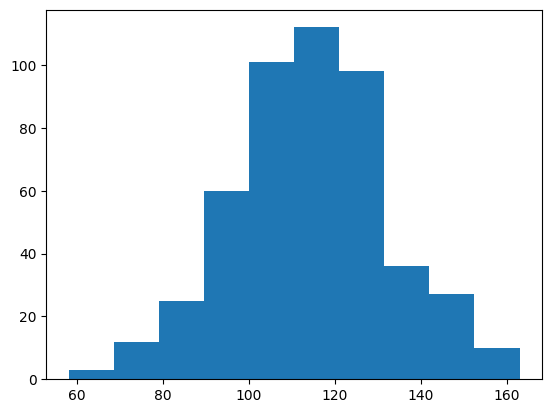

In [228]:
# Histogram cho nhóm mẹ hút thuốc
plt.hist(group1)

(array([  3.,   3.,   6.,  10.,  15.,  45.,  81., 135., 153., 127.,  86.,
         42.,  19.,  10.,   7.]),
 array([ 55.        ,  63.06666667,  71.13333333,  79.2       ,
         87.26666667,  95.33333333, 103.4       , 111.46666667,
        119.53333333, 127.6       , 135.66666667, 143.73333333,
        151.8       , 159.86666667, 167.93333333, 176.        ]),
 <BarContainer object of 15 artists>)

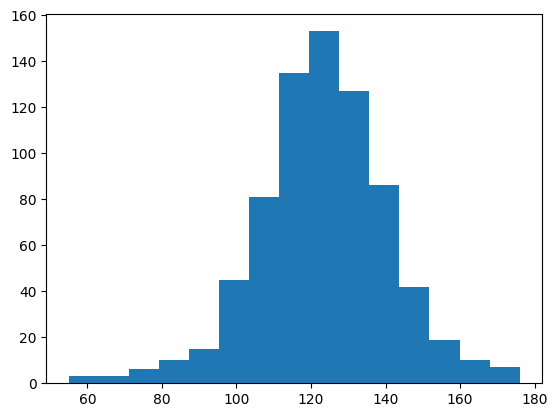

In [229]:
# Histogram cho nhóm mẹ không hút thuốc
plt.hist(group2, bins=15) 

<AxesSubplot:ylabel='bwt'>

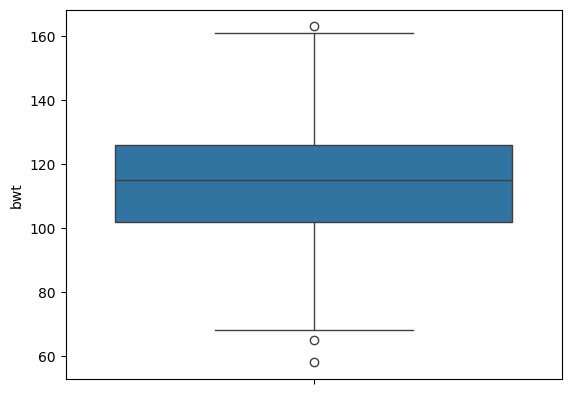

In [230]:
# Lọc dữ liệu chỉ cho nhóm mẹ hút thuốc
group_smoke = df[df['smoke'] == 1]

# Vẽ Boxplot cho nhóm mẹ hút thuốc
sns.boxplot(y='bwt', data=group_smoke)


<AxesSubplot:ylabel='bwt'>

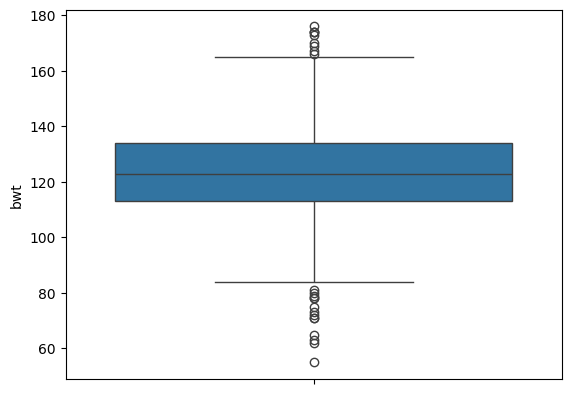

In [231]:
# Lọc dữ liệu chỉ cho nhóm mẹ hút thuốc
group_nonsmoke = df[df['smoke'] == 0]

# Vẽ Boxplot cho nhóm mẹ hút thuốc
sns.boxplot(y='bwt', data=group_nonsmoke)

C:\Users\Admin\AppData\Local\Temp\ipykernel_340\3648777246.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoke', y='bwt', data=df, palette='Set2')


<AxesSubplot:xlabel='smoke', ylabel='bwt'>

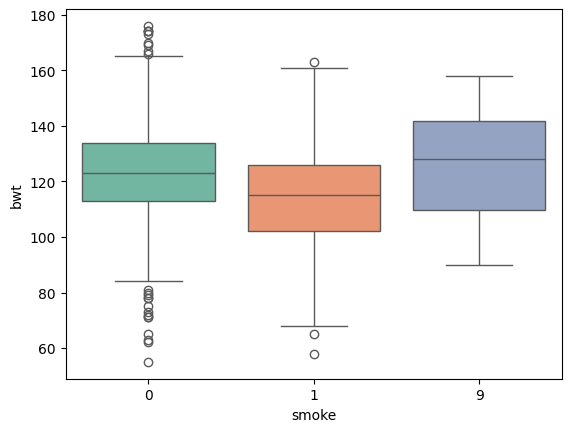

In [232]:
# Boxplot cho nhóm mẹ hút thuốc và không hút thuốc
sns.boxplot(x='smoke', y='bwt', data=df, palette='Set2')

Text(0.5, 1.0, 'QQ-plot - Mẹ hút thuốc')

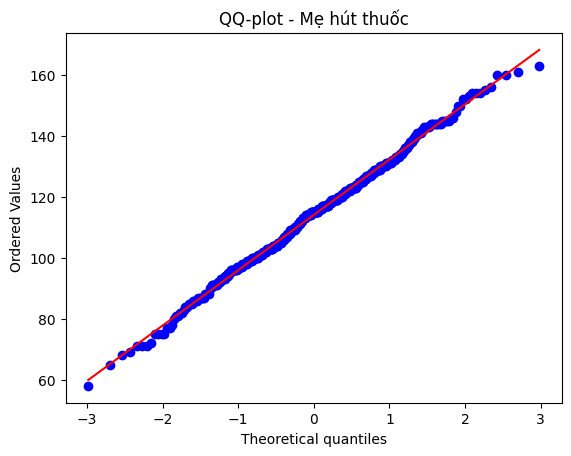

In [234]:
# QQ-plot cho nhóm mẹ hút thuốc
stats.probplot(group1, dist="norm", plot=plt)
plt.title('QQ-plot - Mẹ hút thuốc')

Text(0.5, 1.0, 'QQ-plot - Mẹ không hút thuốc')

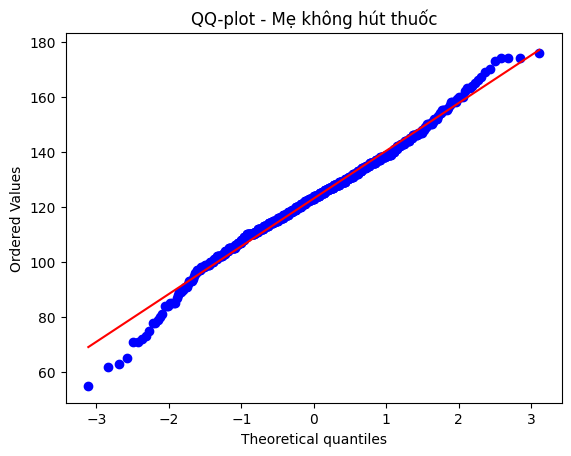

In [237]:
# QQ-plot cho nhóm mẹ không hút thuốc
stats.probplot(group2, dist="norm", plot=plt)
plt.title('QQ-plot - Mẹ không hút thuốc')